### Exercise 3 (Prelude to RBC model)

Consider the Solow-Swan model from the last tutorial. Suppose that the total factor productivity term $A_{t}$ is described by a Markov chain on three finite states in the set $S := \{ 0.5, 1, 1.5 \}$.

$$
    P = \left(
        \begin{matrix}
            0.671 & 0.029 & .3
            \\
            0.145 & 0.778 & 0.077
            \\
            0 & 0.508 & 0.492
        \end{matrix}
        \right).
$$

1. Write a Python program to simulate the outcomes of per-capita

    * Capital stock

    * Consumption

    * Output

    * Investment

  for a sample of length $T = 150$. 

2. Compute the Monte-Carlo simulated time-series data properties: mean, covariance, autocorrelations.


# My Solution to Exercise 3:

Below I create a function, McSwan, that calculates the key values of consumption, capital, and output per person in the Solow-Swan model with a TFP that is determined by above Markov Process.

Try function out for different S, P, T, given mu0 or k0, or different Solow-Swan parameters: d, s, alpha. Function should be robust enough to deal with any size S...

Suggestions? Errors?

Still can't calculate autocorrelation - no idea how to intuitively do this?

In [2]:
##Function that achieves above code:##
"""
**McSwan() (c) Chris Higginson 2017**
Markov Chain TFP with Solow Swan Capital accumulation:
McSwan models:
    Output: Data: T x 4 matrix:
                    k_t 'capital stock per person'
                    c_t 'consumption per person'
                    y_t 'output per person'
                    s_t 'savings per person'
            Which is mapping from:
    Input: Experiment parameters:
                [Defaults]: T = 100
           McTFP(): Outputs: A_t (1xT), mu_t (S.size x T)
                    Inputs:
                        [Defaults]: mu_0 = random probability for each state
                                    S = NO DEFAULT
                                    P = NO DEFAULT
                                    T = as above
           Solow-Swan parameters:
                [Defaults:] k_0 = ****TO DETERMINE DEFAULT****
                            d   = 0.1
                            alpha = 0.33 #capital share of output
                            savings = 0.2
"""

import numpy as np
import matplotlib as mpl
import pandas
import IPython.display as display

#Preliminary functions required:
"""1. function to choose, based on prob. distro mu_t a given state A_t in S"""
def TFP_next(S, mu):
    return np.random.choice(S, replace=False, p=mu) #function chooses element in S given mu0

"""2. Function to return, using TFP_next, the 1xT array of A_t 
based on transition matrix P, state space S, and initial distro mu_0"""
def McTFP(S, P, T=100, mu0=None):
    #Determine if initial mu0 is given, or default
    if mu0 == None:
        mu0 = np.zeros(len(S)) #mu is size of list S, state space
        randbasemu0 = np.random.rand(len(S)) #uniformly distributed random number
        for s in range(len(S)):
            mu0[s] = randbasemu0[s]/sum(randbasemu0) #to ensure each mu[i] is s.t they all sum to 1
    
    #Create array mu_t with T rows, S columns (i.e. ==#rows of P)
    mu_t = np.zeros((T,P.shape[0]))
    mu_t[0,:] = mu0
    #Create array A_t populated with zeros, with initial A_t == random choice from mu_t[0]
    A_t = np.zeros(T)
    A_t[0] = TFP_next(S,mu0)
    
    for i in range(T-1):
        mu_next = np.dot(mu_t[i,:],P) #for each t, calculate new mu_t+1 unconditional distro
        mu_t[i+1,:] = mu_next #store this value in mu_t[i+1] row, populating each column i with ith element in mu_next
        A_next = TFP_next(S, mu_next) #chooses from S given prob distro mu_next
        A_t[i+1] = A_next #stores this value
    return [mu_t, A_t]

### Definition of principal function McSwan
def McSwan(S, P, T=100, mu0=None, k0=None, d=0.1, savings=0.2, alpha=0.33):
    if k0==None:
        k0 = np.random.rand(1)
    
    X = McTFP(S, P, T, mu0)
    X[1] = A_t
    
    k_t = np.zeros(T)
    k_t[0] = k0
    
    #calculate changing capital accumulation, given k_t equation and given A_T
    for i in range(T-1):
        k_next = (1 - delta)*k_t[i] + savings*(A_t[i] * (k_t[i]**alpha))
        k_t[i+1] = k_next
    
    #calculating y, c, and investment (s)
    y_t = np.zeros(T)
    c_t = np.zeros(T)
    s_t = np.zeros(T)
    
    for i in range(T):
        y_t[i] = A_t[i] * k_t[i]**alpha
        s_t[i] = savings * k_t[i]
        c_t[i] = y_t[i] - s_t[i]
        
    #Output
    mpl.pyplot.plot(k_t, 'r-', label='$k_t$')
    
    #Now, plotting some comparison Solow-swan growth plans, 1 per element in S.
    ka0 = k_t[0]
    kb0 = k_t[0]
    kc0 = k_t[0]
    graphables = np.zeros((T,3))
    graphables[0,:] = np.array([ka0, kb0, kc0])

    for j in range(len(S)):
        for i in range(T-1):
            k_next = (1 - delta)*graphables[i,j] + savings*(S[j] * (graphables[i,j]**alpha))
            graphables[i+1,j] = k_next
        mpl.pyplot.plot(graphables[:,j],'k--')
        
    mpl.pyplot.xlabel('$k_t$')
    mpl.pyplot.ylabel('$k_{t+1}$')
    mpl.pyplot.title('Growth of $k_t$ with & without dynamic TFP')
    mpl.pyplot.show()
    # Now displaying results: Capital, consumption, output and investment per person
    Data = np.array([k_t, c_t, y_t, s_t]).T
    ColumnLabels = ['Capital', 'Consumption', 'Output', 'Savings']
    print("\nResults ...\n")
    df = pandas.DataFrame(Data, columns=ColumnLabels)
    print(df.to_string(index=True))
    # Displaying Covariance matrix
    df = pandas.DataFrame(Data, columns=ColumnLabels)
    cov = df.cov()
    print('\nThe covariance matrix is... \n')
    print(cov)
    # Displaying mean
    mean = df.mean()
    print('\nThe Mean values are...\n')
    print(mean)

In [ ]:
S = np.array([0.5,1.,1.5])
P = np.array([[0.671,0.029,0.3],[0.145,0.778,0.077],[0,0.508,0.492]])

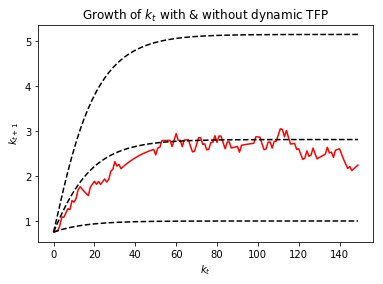


Results ...

      Capital  Consumption    Output   Savings
0    0.752008     0.304716  0.455117  0.150402
1    0.767830     0.304689  0.458255  0.153566
2    0.782698     0.765790  0.922330  0.156540
3    0.888895     1.265040  1.442819  0.177779
4    1.088569     0.296487  0.514200  0.217714
5    1.082552     0.810011  1.026522  0.216510
6    1.179601     0.820101  1.056021  0.235920
7    1.272845     0.286865  0.541435  0.254569
8    1.253848     1.365493  1.616263  0.250770
9    1.451716     0.275103  0.565446  0.290343
10   1.419633     0.838655  1.122582  0.283927
11   1.502186     1.415139  1.715577  0.300437
12   1.695083     0.851219  1.190236  0.339017
13   1.763622     0.250229  0.602953  0.352724
14   1.707850     0.255023  0.596593  0.341570
15   1.656384     0.259323  0.590600  0.331277
16   1.608865     0.263181  0.584954  0.321773
17   1.564970     1.425921  1.738914  0.312994
18   1.756256     0.852991  1.204242  0.351251
19   1.821479     0.854525  1.218821  0.364296

In [4]:
McSwan(S,P, T=150)